In [1]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import glob
import keras
import tensorflow
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score 


In [2]:
img_width, img_height = 224, 224

In [3]:

def count_images_in_folders(directory_path):

    folders = [folder for folder in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, folder))]

    for folder in folders:
        folder_path = os.path.join(directory_path, folder)
        image_files = glob.glob(os.path.join(folder_path, '*.jpg')) + glob.glob(os.path.join(folder_path, '*.png'))  # Add other image extensions if needed
        image_count = len(image_files)

        print(f"Folder {folder}: {image_count} images")

if __name__ == "__main__":
    directory_path = "augmented_data"
    count_images_in_folders(directory_path)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'augmented_data'

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory("augmented_data",
                                                 target_size = (img_width, img_height),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
print("Class indices (folder names) in order:")

indices=training_set.class_indices
indices

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'augmented_data'

In [40]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory("Dataset/test",
                                            target_size = (img_width, img_height),
                                            batch_size = 32,
                                            class_mode = 'categorical')
print("Class indices (folder names) in order:")
print(training_set.class_indices)

Found 895 images belonging to 19 classes.
Class indices (folder names) in order:
{'Acne and Rosacea Photos': 0, 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions': 1, 'Atopic Dermatitis Photos': 2, 'Cellulitis Impetigo and other Bacterial Infections': 3, 'Eczema Photos': 4, 'Exanthems and Drug Eruptions': 5, 'Hepres': 6, 'Light Diseases and Disorders of Pigmentation': 7, 'Lupus': 8, 'Melanoma Skin Cancer Nevi and Moles': 9, 'Poison Ivy Photos and other Contact Dermatitis': 10, 'Psoriasis pictures Lichen Planus and related diseases': 11, 'Seborrheic Keratoses and other Benign Tumors': 12, 'Systemic Disease': 13, 'Tinea Ringworm Candidiasis and other Fungal Infection': 14, 'Urticaria Hives': 15, 'Vascular Tumors': 16, 'Warts Molluscum and other Viral Infections': 17, 'vasculitis Photos': 18}


VG-19 MODEL

In [41]:
base_model=VGG19(include_top=False, weights='imagenet', input_shape=(img_width, img_height, 3))

In [42]:
for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(19, activation='softmax'))

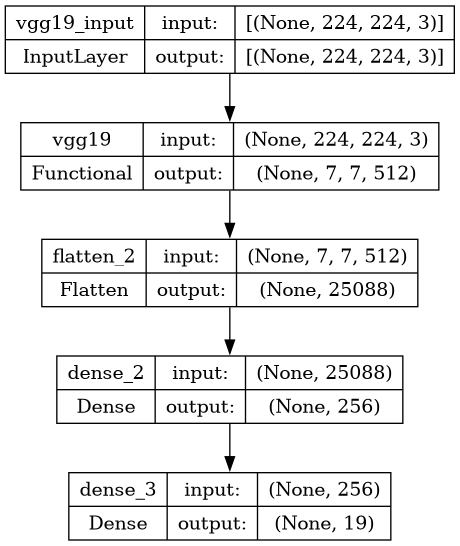

In [43]:
plot_model(model=model, show_shapes=True)

In [44]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




In [45]:
model.fit(training_set, epochs=10, validation_data=test_set)

Epoch 1/10
208/208 [==============================] - 1675s 8s/step - loss: 2.3678 - accuracy: 0.3692 - val_loss: 3.0171 - val_accuracy: 0.2503
Epoch 2/10
208/208 [==============================] - 1663s 8s/step - loss: 1.4548 - accuracy: 0.5620 - val_loss: 4.3910 - val_accuracy: 0.2894
Epoch 3/10
208/208 [==============================] - 1665s 8s/step - loss: 1.1028 - accuracy: 0.6661 - val_loss: 4.6580 - val_accuracy: 0.2838
Epoch 4/10
208/208 [==============================] - 1655s 8s/step - loss: 0.8867 - accuracy: 0.7256 - val_loss: 5.3859 - val_accuracy: 0.2872
Epoch 5/10
208/208 [==============================] - 1652s 8s/step - loss: 0.7279 - accuracy: 0.7751 - val_loss: 5.4820 - val_accuracy: 0.3151
Epoch 6/10
208/208 [==============================] - 1703s 8s/step - loss: 0.6874 - accuracy: 0.7834 - val_loss: 5.9072 - val_accuracy: 0.2771
Epoch 7/10
208/208 [==============================] - 1785s 9s/step - loss: 0.5519 - accuracy: 0.8269 - val_loss: 5.7456 - val_accuracy:

In [46]:
import joblib
joblib.dump(model, 'VG19_model.pkl')

['VG19_model.pkl']

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6422784   
                                                                 
 dense_3 (Dense)             (None, 19)                4883      
                                                                 
Total params: 26452051 (100.91 MB)
Trainable params: 6427667 (24.52 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [51]:
history=model.fit(training_set, epochs=10, validation_data=test_set)

Epoch 1/10
208/208 [==============================] - 1706s 8s/step - loss: 0.4078 - accuracy: 0.8687 - val_loss: 7.8159 - val_accuracy: 0.3061
Epoch 2/10
208/208 [==============================] - 1643s 8s/step - loss: 0.3833 - accuracy: 0.8762 - val_loss: 7.6375 - val_accuracy: 0.3095
Epoch 3/10
208/208 [==============================] - 1628s 8s/step - loss: 0.3633 - accuracy: 0.8792 - val_loss: 7.4882 - val_accuracy: 0.3173
Epoch 4/10
208/208 [==============================] - 1637s 8s/step - loss: 0.3350 - accuracy: 0.8887 - val_loss: 8.1930 - val_accuracy: 0.2849
Epoch 5/10
208/208 [==============================] - 1631s 8s/step - loss: 0.2949 - accuracy: 0.9047 - val_loss: 9.1281 - val_accuracy: 0.2112
Epoch 6/10
208/208 [==============================] - 1671s 8s/step - loss: 0.2956 - accuracy: 0.9043 - val_loss: 8.7323 - val_accuracy: 0.3318
Epoch 7/10
208/208 [==============================] - 1644s 8s/step - loss: 0.2831 - accuracy: 0.9047 - val_loss: 9.5961 - val_accuracy:

In [55]:
import joblib
joblib.dump(model, 'VG19_model_better.pkl')

['VG19_model_better.pkl']

In [62]:
from keras.preprocessing import image
import numpy as np


image_path = "/home/kushagra/Documents/code/AI/hack_project/augmented_data/Light Diseases and Disorders of Pigmentation/actinic-comedones-2.jpg"

img = image.load_img(image_path, target_size=(img_width, img_height))


img_array = image.img_to_array(img)

img_array = np.expand_dims(img_array, axis=0)


img_array /= 255.0

prediction = model.predict(img_array)
for i, percentage in enumerate(prediction[0]):
   
    print(f": {percentage * 100:.2f}%")

1/1 [==============================] - 0s 132ms/step
: 6.20%
: 19.85%
: 0.00%
: 0.01%
: 0.00%
: 0.00%
: 0.00%
: 72.11%
: 0.01%
: 0.30%
: 0.01%
: 0.01%
: 0.07%
: 0.14%
: 0.46%
: 0.00%
: 0.00%
: 0.84%
: 0.00%


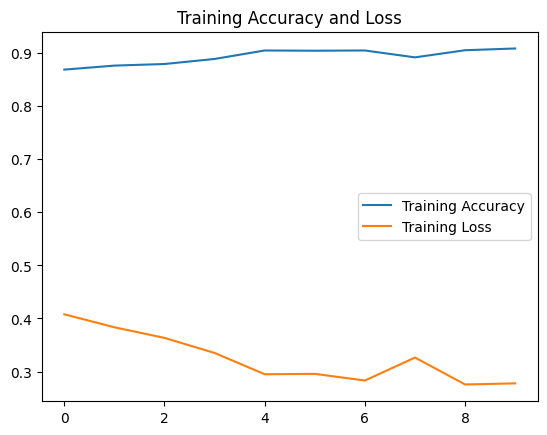

In [60]:
accuracy = history.history['accuracy']


loss = history.history['loss']


epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, loss, label='Training Loss')
plt.legend()
plt.title('Training Accuracy and Loss')



plt.show()